In [1]:
import pandas as pd

In [3]:
# distritos_sp = pd.read_csv('/content/drive/MyDrive/Colab_notebooks/PCA_alura/distritos_sp.csv')

distritos_sp = pd.read_csv('distritos_sp.csv')

In [4]:
distritos_sp

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994
...,...,...,...,...,...,...,...,...,...,...,...
91,92,Vila Medeiros,1405,19.760000,6.8,27,15.43,-1.410000,77.980003,2.49,188.929993
92,93,Vila Prudente,1755,32.080002,7.2,30,14.36,-2.550000,66.510002,7.43,101.440002
93,94,Vila Sônia,2970,41.410000,7.4,27,16.76,-0.900000,74.680000,14.93,80.120003
94,95,São Domingos,2047,23.510000,6.8,26,14.30,0.710000,62.349998,8.55,72.919998


In [5]:
distritos_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cod_ibge      96 non-null     int64  
 1   distritos     96 non-null     object 
 2   renda         96 non-null     int64  
 3   quota         96 non-null     float64
 4   escolaridade  96 non-null     float64
 5   idade         96 non-null     int64  
 6   mortalidade   96 non-null     float64
 7   txcresc       96 non-null     float64
 8   causasext     96 non-null     float64
 9   favel         96 non-null     float64
 10  denspop       96 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 8.4+ KB


In [6]:
variaveis_numericas = distritos_sp.drop(['cod_ibge','distritos'], axis=1)
variaveis_numericas.corr()

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
renda,1.000000,0.920099,0.777332,0.732307,-0.519585,-0.424711,-0.462516,-0.146957,-0.019711
quota,0.920099,1.000000,0.850455,0.832737,-0.520282,-0.554767,-0.491020,-0.243010,0.057374
escolaridade,0.777332,0.850455,1.000000,0.955825,-0.582601,-0.692968,-0.606621,-0.432548,0.157673
idade,0.732307,0.832737,0.955825,1.000000,-0.553758,-0.703237,-0.615073,-0.499838,0.141469
mortalidade,-0.519585,-0.520282,-0.582601,-0.553758,1.000000,0.346049,0.422790,0.130877,-0.093018
txcresc,-0.424711,-0.554767,-0.692968,-0.703237,0.346049,1.000000,0.234472,0.281853,-0.279084
causasext,-0.462516,-0.491020,-0.606621,-0.615073,0.422790,0.234472,1.000000,0.404447,-0.045281
favel,-0.146957,-0.243010,-0.432548,-0.499838,0.130877,0.281853,0.404447,1.000000,-0.106481
denspop,-0.019711,0.057374,0.157673,0.141469,-0.093018,-0.279084,-0.045281,-0.106481,1.000000


In [7]:
!pip install factor_analyzer

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 KB 442.2 kB/s eta 0:00:00 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 4.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 6.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 10.0 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42587 sha256=52cfcfa6ba2c59351fdf45ad7f5c837358ee43920abc34add4e647a71dde7707
  Stored in directory: /home/alyne/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


# Teste de esferacidde

Teste de esfericidade de Bartlett, para ver se os nossos dados são adequados para utilização do PCA. 
Quanto mais próximo de 1, melhor a adequação dos dados, ele indica a proporção de variância dos dados.

In [8]:
from factor_analyzer import calculate_kmo
kmo_variaveis, kmo = calculate_kmo(variaveis_numericas)

In [9]:
# Variância de cada variável
kmo_variaveis

array([0.77821831, 0.81941916, 0.8560973 , 0.81750459, 0.94677797,
       0.84146713, 0.89083164, 0.78871213, 0.63275248])

In [10]:
# Variância global
kmo

0.833091424182929

Tanto o KMO individual quanto o global das variáveis indica que temos um conjunto de dados que pode ser utilizado para aplicar o PCA

In [11]:
# Teste estatísitico para comprovação de que podemos usar as variáveis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [12]:
qui_quadrado, p_valor = calculate_bartlett_sphericity(variaveis_numericas)

In [13]:
qui_quadrado

748.1593126421544

In [14]:
p_valor

5.607017481839493e-134

Portanto, com um p-valor muito baixo, rejeitamos nossa hipótese nula em que testamos se as correlações eram iguais a zero. Logo, temos que os dados podem ser usados para gerar o PCA

# Aplicação do PCA

Transformação dos dados para padronização e utilização das técnicas

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
colunas_numericas = variaveis_numericas.columns

In [17]:
colunas_numericas

Index(['renda', 'quota', 'escolaridade', 'idade', 'mortalidade', 'txcresc',
       'causasext', 'favel', 'denspop'],
      dtype='object')

In [18]:
# Transformando as colunas do df
variaveis_numericas_padronizadas = StandardScaler().fit_transform(variaveis_numericas)

In [19]:
dados_padronizados  = pd.DataFrame(variaveis_numericas_padronizadas, columns=colunas_numericas)
dados_padronizados

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,0.108502,0.180715,0.523096,1.055413,-0.429282,-0.538806,-0.780681,-0.756406,0.521805
1,2.406305,1.984386,1.320195,1.284643,-1.471886,-0.733574,-1.401978,-0.668425,-0.857184
2,-0.790323,-1.133425,-1.270377,-1.007657,-0.127369,5.178222,-2.087086,-0.756406,-1.849934
3,-0.564581,-0.412655,-0.274003,-0.090737,0.490545,-0.318259,0.221327,-0.070409,0.783822
4,-0.629818,-0.635605,-0.074728,-0.090737,0.752202,-0.412779,-0.165420,-0.232345,1.368651
...,...,...,...,...,...,...,...,...,...
91,-0.467243,-0.467629,-0.274003,-0.090737,-0.113280,-0.415643,0.297211,-0.438909,1.804943
92,-0.104813,0.069895,0.124547,0.596953,-0.328644,-0.742167,-0.197326,0.190984,0.032016
93,1.153335,0.476964,0.323822,-0.090737,0.154416,-0.269567,0.154929,1.147301,-0.400020
94,0.197556,-0.304016,-0.274003,-0.319967,-0.340721,0.191576,-0.376687,0.333794,-0.545923


In [20]:
from sklearn.decomposition import PCA

In [21]:
# A quantidade de fatores correspode a quantidade de variáveis numericas no meu banco
n_fatores = dados_padronizados.shape[1]
n_fatores

9

In [23]:
pca = PCA(n_components=n_fatores)
pca.fit(dados_padronizados)

PCA(n_components=9)

In [24]:
pca

PCA(n_components=9)

Porcentagem de variância explicada por cada um dos fatores.

O primeiro fator explica 55% dos dados.

In [25]:
pca.explained_variance_ratio_

array([0.55067008, 0.1293709 , 0.11070601, 0.08045185, 0.05881136,
       0.04425824, 0.01440763, 0.00722961, 0.00409432])

# Gráficos

In [28]:
import plotly.express as px
import numpy as np

In [29]:
fatores = [ f'F{i+1}' for i in range(n_fatores)]
fatores


['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']

In [30]:
fig=px.bar(x=fatores, y=pca.explained_variance_ratio_, 
       text=np.around(pca.explained_variance_ratio_, decimals=2),
        title='Scree Plot')
fig.update_layout(yaxis = {'title': 'Porcentagem Explicada'},
                  xaxis = {'title' : 'Fatores'})



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'x=%{x}<br>y=%{y}<br>text=%{text}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'text': array([0.55, 0.13, 0.11, 0.08, 0.06, 0.04, 0.01, 0.01, 0.  ]),
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9'], dtype=object),
              'xaxis': 'x',
              'y': array([0.55067008, 0.1293709 , 0.11070601, 0.08045185, 0.05881136, 0.04425824,
                          0.01440763, 0.00722961, 0.00409432]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Scree Plot'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Fatores'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Porcentagem Explicada'}}}
})

In [31]:
variancia_acumulada = [sum(pca.explained_variance_ratio_[0:i+1]) for i in range(n_fatores)]
variancia_acumulada

[0.5506700772160414,
 0.6800409820794434,
 0.7907469955852215,
 0.8711988432249137,
 0.9300102025439659,
 0.9742684414070403,
 0.9886760753033327,
 0.9959056848263385,
 0.9999999999999999]

In [32]:
fig=px.bar(x=fatores, y=variancia_acumulada, 
       text=np.around(variancia_acumulada, decimals=3),
        title='Scree Plot')
fig.update_layout(yaxis = {'title': 'Variancia Acumulada'},
                  xaxis = {'title' : 'Fatores'})

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'x=%{x}<br>y=%{y}<br>text=%{text}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'text': array([0.551, 0.68 , 0.791, 0.871, 0.93 , 0.974, 0.989, 0.996, 1.   ]),
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9'], dtype=object),
              'xaxis': 'x',
              'y': array([0.55067008, 0.68004098, 0.790747  , 0.87119884, 0.9300102 , 0.97426844,
                          0.98867608, 0.99590568, 1.        ]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Scree Plot'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Fatores'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Variancia Acumulada'}}}
})

Com apenas 2 a 3 fatores já explico 80% dos dados, percebemos que o pca se adequou bem pois com poucos fatores explico grande parte dos meus dados.

 explained_variance_ vai nos dizer a quantidade de variáveis que é explicada por cada um dos fatores.

In [33]:
pca.explained_variance_

array([5.00819944, 1.17659433, 1.00684206, 0.73168838, 0.53487384,
       0.40251704, 0.13103364, 0.0657514 , 0.03723672])

O primeiro fator explica 5 variáveis, o segundo explica 1,17 variáveis

A soma da quantidade de variáveis que o fator explica deve ser igual a quantidade de variáveis, assim como, o % de explicabilidade de cada fator * quantidade de fatores também deve ser igual ao total de variáveis

In [34]:
print(sum(pca.explained_variance_ratio_ * n_fatores))
print(sum(pca.explained_variance_))

8.999999999999998
9.094736842105261


Com uma pequena diferença, escolhemos como autovalor o que mais se aproxima da quantidade de variáveis. 
Os autovalores indicam quantas variáveis estamos explicando em cada fator

In [35]:
autovalores = pca.explained_variance_ratio_ * n_fatores
autovalores

array([4.95603069, 1.16433814, 0.99635412, 0.72406663, 0.52930223,
       0.39832415, 0.12966871, 0.06506649, 0.03684884])

 Raiz latente, ou critério de Kaiser, indica quantos fatores vamos utilizar na nossa análise do PCA quando temos um autovalor >1.

 Apenas os dois primeiros fatores possuem autovalor >1

In [36]:
selecionados = ['Fator selecionado' if i>1 else 'Fator não selecionado' for i in autovalores]
selecionados

['Fator selecionado',
 'Fator selecionado',
 'Fator não selecionado',
 'Fator não selecionado',
 'Fator não selecionado',
 'Fator não selecionado',
 'Fator não selecionado',
 'Fator não selecionado',
 'Fator não selecionado']

In [37]:
fig=px.bar(x=range(1,10), y=autovalores, 
       text=np.around(autovalores, decimals=3),
        title='Scree Plot', color = selecionados)
fig.update_layout(yaxis = {'title': 'Quantidade de variáveis explicadas'},
                  xaxis = {'title' : 'Autovalor'})

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'color=Fator selecionado<br>x=%{x}<br>y=%{y}<br>text=%{text}<extra></extra>',
              'legendgroup': 'Fator selecionado',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'Fator selecionado',
              'offsetgroup': 'Fator selecionado',
              'orientation': 'v',
              'showlegend': True,
              'text': array([4.956, 1.164]),
              'textposition': 'auto',
              'type': 'bar',
              'x': array([1, 2]),
              'xaxis': 'x',
              'y': array([4.95603069, 1.16433814]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'color=Fator não selecionado<br>x=%{x}<br>y=%{y}<br>text=%{text}<extra></extra>',
              'legendgroup': 'Fator não selecionado',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'Fator não selecionado',
              'offsetgroup': 'Fator não selecionado',
              'orientation': 'v',
              'showlegend': True,
              'text': array([0.996, 0.724, 0.529, 0.398, 0.13 , 0.065, 0.037]),
              'textposition': 'auto',
              'type': 'bar',
              'x': array([3, 4, 5, 6, 7, 8, 9]),
              'xaxis': 'x',
              'y': array([0.99635412, 0.72406663, 0.52930223, 0.39832415, 0.12966871, 0.06506649,
                          0.03684884]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'color'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Scree Plot'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Autovalor'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Quantidade de variáveis explicadas'}}}
})

Para identificarmos os autovetores teremos n itens vetoriais com os pesos para cada autovalor.

Cada vetor é utilizado para construir um fator que é composto por autovetores que carrega os pesos pra cada variável


> Bloco com recuo



In [ ]:
pca.components_

array([[ 0.37378561,  0.40454585,  0.43416448,  0.431286  , -0.29453553,
        -0.31298937, -0.29942197, -0.20536447,  0.0746924 ],
       [ 0.34194215,  0.20986443, -0.02279207, -0.06065282, -0.16369471,
         0.31272645, -0.04069338,  0.41039975, -0.73495343],
       [-0.17295765, -0.15501444, -0.00935731,  0.06348322,  0.17379496,
         0.27775581, -0.43911857, -0.68814007, -0.41015077],
       [-0.06339126, -0.13996332, -0.08458471, -0.12690816, -0.58019562,
         0.45311541, -0.49035151,  0.1587924 ,  0.38148578],
       [ 0.34200389,  0.27796072,  0.00388393, -0.03140668,  0.68113225,
         0.35010444, -0.28968662,  0.14639622,  0.33601377],
       [ 0.30718994,  0.21266882, -0.051763  , -0.06507346, -0.21449531,
         0.46702002,  0.58641913, -0.46772469,  0.16347059],
       [ 0.35731885,  0.14779821, -0.5314497 , -0.53511308, -0.08829316,
        -0.42300489, -0.21675972, -0.21903914, -0.00154526],
       [-0.56495425,  0.74089992, -0.33214191,  0.12879361, -0

In [ ]:
# Vamos multiplicar cada peso pelas variáveis
pd.DataFrame(pca.components_, columns = colunas_numericas, index=range(1,n_fatores+1))

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
1,0.373786,0.404546,0.434164,0.431286,-0.294536,-0.312989,-0.299422,-0.205364,0.074692
2,0.341942,0.209864,-0.022792,-0.060653,-0.163695,0.312726,-0.040693,0.410400,-0.734953
3,-0.172958,-0.155014,-0.009357,0.063483,0.173795,0.277756,-0.439119,-0.688140,-0.410151
4,-0.063391,-0.139963,-0.084585,-0.126908,-0.580196,0.453115,-0.490352,0.158792,0.381486
5,0.342004,0.277961,0.003884,-0.031407,0.681132,0.350104,-0.289687,0.146396,0.336014
6,0.307190,0.212669,-0.051763,-0.065073,-0.214495,0.467020,0.586419,-0.467725,0.163471
7,0.357319,0.147798,-0.531450,-0.535113,-0.088293,-0.423005,-0.216760,-0.219039,-0.001545
8,-0.564954,0.740900,-0.332142,0.128794,-0.043236,0.046332,-0.022126,0.019462,-0.010178
9,-0.226373,0.235400,0.638974,-0.694279,0.002605,-0.004163,-0.011863,-0.045723,-0.027849


In [ ]:
variaveis_numericas

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001
1,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001
2,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000
3,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993
4,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994
...,...,...,...,...,...,...,...,...,...
91,1405,19.760000,6.8,27,15.43,-1.410000,77.980003,2.49,188.929993
92,1755,32.080002,7.2,30,14.36,-2.550000,66.510002,7.43,101.440002
93,2970,41.410000,7.4,27,16.76,-0.900000,74.680000,14.93,80.120003
94,2047,23.510000,6.8,26,14.30,0.710000,62.349998,8.55,72.919998


# Cargas Fatoriais

A carga fatorial é uma matriz com a correlação dos fatores e as variáveis originais

In [ ]:
raiz_autovalores = np.sqrt(autovalores)
raiz_autovalores

array([2.22621443, 1.07904501, 0.9981754 , 0.85092105, 0.7275316 ,
       0.63112927, 0.36009541, 0.25508133, 0.19196051])

In [ ]:
# Precisamos multiplicar a transposta da matriz com os vetores pela raiz dos autovalores
cargas_fatoriais = pd.DataFrame(pca.components_.T * raiz_autovalores, columns = fatores, index = colunas_numericas)
cargas_fatoriais

,F1,F2,F3,F4,F5,F6,F7,F8,F9
renda,0.832127,0.368971,-0.172642,-0.053941,0.248819,0.193877,0.128669,-0.144109,-0.043455
quota,0.900606,0.226453,-0.154732,-0.119098,0.202225,0.134222,0.053221,0.188990,0.045188
escolaridade,0.966543,-0.024594,-0.009340,-0.071975,0.002826,-0.032669,-0.191373,-0.084723,0.122658
idade,0.960135,-0.065447,0.063367,-0.107989,-0.022849,-0.041070,-0.192692,0.032853,-0.133274
mortalidade,-0.655699,-0.176634,0.173478,-0.493701,0.495545,-0.135374,-0.031794,-0.011029,0.000500
txcresc,-0.696781,0.337446,0.277249,0.385565,0.254712,0.294750,-0.152322,0.011818,-0.000799
causasext,-0.666578,-0.043910,-0.438317,-0.417250,-0.210756,0.370106,-0.078054,-0.005644,-0.002277
favel,-0.457185,0.442840,-0.686884,0.135120,0.106508,-0.295195,-0.078875,0.004964,-0.008777
denspop,0.166281,-0.793048,-0.409402,0.324614,0.244461,0.103171,-0.000556,-0.002596,-0.005346


In [ ]:
# Vamos olhar apenas os fatores F1 e F2 pois tiveram autovalor superior a 1
resumo_cargas_fatoriais = cargas_fatoriais[['F1', 'F2']]

In [ ]:
resumo_cargas_fatoriais

,F1,F2
renda,0.832127,0.368971
quota,0.900606,0.226453
escolaridade,0.966543,-0.024594
idade,0.960135,-0.065447
mortalidade,-0.655699,-0.176634
txcresc,-0.696781,0.337446
causasext,-0.666578,-0.043910
favel,-0.457185,0.442840
denspop,0.166281,-0.793048


In [ ]:
px.scatter(resumo_cargas_fatoriais, x='F1', y='F2', text = cargas_fatoriais.index)

Observamos que renda, quota e escolaridade possuem alta correlação com o primeiro fator de forma positiva e favel, txcresc, cauasext e mortalidade também possui alta correlação mas no sentido negativo.

A variável denspop possui alta correlação com o fator 2 no sentido negativo.

Comunalidades: é a porcentagem da informação que é explicada em cada uma das variáveis, utilizando esses fatores. 

In [ ]:
resumo_cargas_fatoriais['Comunalidades'] = (resumo_cargas_fatoriais**2).sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
resumo_cargas_fatoriais

,F1,F2,Comunalidades
renda,0.832127,0.368971,0.828575
quota,0.900606,0.226453,0.862372
escolaridade,0.966543,-0.024594,0.934811
idade,0.960135,-0.065447,0.926143
mortalidade,-0.655699,-0.176634,0.461141
txcresc,-0.696781,0.337446,0.599374
causasext,-0.666578,-0.043910,0.446254
favel,-0.457185,0.442840,0.405126
denspop,0.166281,-0.793048,0.656574


Ou seja, utilizando 2 fatores, conseguimos explicar 82% da variável renda.

O intuito é utilizar menos fatores e explicar a maior quantidade de variáveis.

# Criação dos fatores de forma automática

In [ ]:
pd.DataFrame(pca.transform(dados_padronizados), columns = fatores)

,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,1.519105,-0.761299,0.440370,0.256326,-0.134060,-0.202264,-0.177369,0.025619,-0.350088
1,3.985600,1.555514,0.313021,0.070926,0.100206,0.332763,0.655952,-0.105873,-0.055641
2,-2.681205,2.356295,3.872196,3.061874,1.039798,0.920633,-0.793794,0.194619,-0.111070
3,-0.574202,-1.061710,-0.214948,-0.121274,0.105649,-0.204103,-0.011002,0.042348,-0.100050
4,-0.457007,-1.688282,-0.110352,0.089602,0.452111,-0.437592,-0.037891,-0.168406,-0.013653
...,...,...,...,...,...,...,...,...,...
91,-0.222504,-1.876371,-0.553807,0.480278,-0.054540,0.281924,0.172851,-0.051022,-0.148682
92,0.651970,-0.175635,-0.277139,-0.095741,-0.422490,-0.538550,-0.068902,0.134096,-0.299739
93,0.452520,1.141560,-1.023709,-0.413869,0.530598,-0.225303,0.175189,-0.413634,0.079473
94,-0.262248,0.698634,0.148829,0.407752,-0.198409,-0.272673,0.300921,-0.243063,-0.066496


In [ ]:
pca2 = PCA(n_components=2)
pd.DataFrame(pca2.fit_transform(dados_padronizados), columns=['F1','F2'])

,F1,F2
0,1.519105,-0.761299
1,3.985600,1.555514
2,-2.681205,2.356295
3,-0.574202,-1.061710
4,-0.457007,-1.688282
...,...,...
91,-0.222504,-1.876371
92,0.651970,-0.175635
93,0.452520,1.141560
94,-0.262248,0.698634


In [ ]:
# Autovetores
pca.components_

array([[ 0.37378561,  0.40454585,  0.43416448,  0.431286  , -0.29453553,
        -0.31298937, -0.29942197, -0.20536447,  0.0746924 ],
       [ 0.34194215,  0.20986443, -0.02279207, -0.06065282, -0.16369471,
         0.31272645, -0.04069338,  0.41039975, -0.73495343],
       [-0.17295765, -0.15501444, -0.00935731,  0.06348322,  0.17379496,
         0.27775581, -0.43911857, -0.68814007, -0.41015077],
       [-0.06339126, -0.13996332, -0.08458471, -0.12690816, -0.58019562,
         0.45311541, -0.49035151,  0.1587924 ,  0.38148578],
       [ 0.34200389,  0.27796072,  0.00388393, -0.03140668,  0.68113225,
         0.35010444, -0.28968662,  0.14639622,  0.33601377],
       [ 0.30718994,  0.21266882, -0.051763  , -0.06507346, -0.21449531,
         0.46702002,  0.58641913, -0.46772469,  0.16347059],
       [ 0.35731885,  0.14779821, -0.5314497 , -0.53511308, -0.08829316,
        -0.42300489, -0.21675972, -0.21903914, -0.00154526],
       [-0.56495425,  0.74089992, -0.33214191,  0.12879361, -0

In [ ]:
# nome das variáveis
pca.feature_names_in_

array(['renda', 'quota', 'escolaridade', 'idade', 'mortalidade',
       'txcresc', 'causasext', 'favel', 'denspop'], dtype=object)

In [ ]:
F1 = np.zeros(dados_padronizados.shape[0])

In [ ]:
# O sklearn utiliza os autovetor pra calcular os fatoriais e não os scores fatoriais
# Pega cada valor do vetor e multiplica pela coluna de variáveis
for i, variavel in enumerate(pca.feature_names_in_):
  F1 += pca.components_[0][i] * dados_padronizados[variavel]

In [ ]:
# Valores iguais os obtidos no fit_transform
F1

0     1.519105
1     3.985600
2    -2.681205
3    -0.574202
4    -0.457007
        ...   
91   -0.222504
92    0.651970
93    0.452520
94   -0.262248
95   -2.870093
Name: renda, Length: 96, dtype: float64

In [ ]:
# E na verdade os scores faoriais são os autovetores/ raiz dos autovalores
# autovetors
print(pca.components_)

#raiz dos autovalores
print(raiz_autovalores)

[[ 0.37378561  0.40454585  0.43416448  0.431286   -0.29453553 -0.31298937
  -0.29942197 -0.20536447  0.0746924 ]
 [ 0.34194215  0.20986443 -0.02279207 -0.06065282 -0.16369471  0.31272645
  -0.04069338  0.41039975 -0.73495343]
 [-0.17295765 -0.15501444 -0.00935731  0.06348322  0.17379496  0.27775581
  -0.43911857 -0.68814007 -0.41015077]
 [-0.06339126 -0.13996332 -0.08458471 -0.12690816 -0.58019562  0.45311541
  -0.49035151  0.1587924   0.38148578]
 [ 0.34200389  0.27796072  0.00388393 -0.03140668  0.68113225  0.35010444
  -0.28968662  0.14639622  0.33601377]
 [ 0.30718994  0.21266882 -0.051763   -0.06507346 -0.21449531  0.46702002
   0.58641913 -0.46772469  0.16347059]
 [ 0.35731885  0.14779821 -0.5314497  -0.53511308 -0.08829316 -0.42300489
  -0.21675972 -0.21903914 -0.00154526]
 [-0.56495425  0.74089992 -0.33214191  0.12879361 -0.04323611  0.04633227
  -0.02212608  0.0194618  -0.0101779 ]
 [-0.2263729   0.23540004  0.63897423 -0.69427882  0.00260451 -0.00416312
  -0.01186317 -0.04572

In [ ]:
scores_fatoriais = np.zeros(pca.components_.shape)

In [ ]:
for i in range(len(pca.components_)):
  scores_fatoriais[i] = pca.components_[i]/raiz_autovalores[i]

In [ ]:
scores_fatoriais

array([[ 0.16790189,  0.18171917,  0.19502366,  0.19373066, -0.13230331,
        -0.14059264, -0.13449826, -0.09224829,  0.0335513 ],
       [ 0.31689332,  0.19449089, -0.02112244, -0.05620973, -0.15170332,
         0.2898178 , -0.0377124 ,  0.38033608, -0.68111471],
       [-0.1732738 , -0.1552978 , -0.00937442,  0.06359926,  0.17411264,
         0.27826353, -0.43992125, -0.68939795, -0.4109005 ],
       [-0.07449723, -0.16448449, -0.09940371, -0.14914211, -0.68184425,
         0.53249994, -0.5762597 ,  0.18661238,  0.448321  ],
       [ 0.47008802,  0.38205999,  0.00533851, -0.04316882,  0.93622359,
         0.48122231, -0.39817738,  0.20122318,  0.46185453],
       [ 0.48673063,  0.33696555, -0.08201647, -0.10310639, -0.33985956,
         0.73997522,  0.92915851, -0.74109174,  0.25901285],
       [ 0.99228938,  0.4104418 , -1.47585803, -1.48603139, -0.2451938 ,
        -1.17470224, -0.6019508 , -0.60828084, -0.00429124],
       [-2.21480047,  2.90456349, -1.30210199,  0.50491194, -0

In [ ]:
# Para calcular os fatores vamos multimplicar os scores fatoriais (pesos) pelas variáveis
F1 = np.zeros(dados_padronizados.shape[0])
for i, variavel in enumerate(pca.feature_names_in_):
  F1 += scores_fatoriais[0][i] * dados_padronizados[variavel]

In [ ]:
F1

0     0.682371
1     1.790304
2    -1.204379
3    -0.257928
4    -0.205284
        ...   
91   -0.099947
92    0.292861
93    0.203269
94   -0.117800
95   -1.289226
Name: renda, Length: 96, dtype: float64

In [ ]:
F2 = np.zeros(dados_padronizados.shape[0])
for i, variavel in enumerate(pca.feature_names_in_):
  F2 += scores_fatoriais[1][i] * dados_padronizados[variavel]

In [ ]:
F2

0    -0.705531
1     1.441565
2     2.183685
3    -0.983935
4    -1.564607
        ...   
91   -1.738918
92   -0.162769
93    1.057936
94    0.647456
95   -0.995189
Name: renda, Length: 96, dtype: float64

In [ ]:
dados = distritos_sp[['cod_ibge','distritos']].copy()

In [ ]:
dados['F1']=F1
dados['F2']=F2

In [ ]:
dados

,cod_ibge,distritos,F1,F2
0,1,Água Rasa,0.682371,-0.705531
1,12,Alto de Pinheiros,1.790304,1.441565
2,23,Anhanguera,-1.204379,2.183685
3,34,Aricanduva,-0.257928,-0.983935
4,45,Artur Alvim,-0.205284,-1.564607
...,...,...,...,...
91,92,Vila Medeiros,-0.099947,-1.738918
92,93,Vila Prudente,0.292861,-0.162769
93,94,Vila Sônia,0.203269,1.057936
94,95,São Domingos,-0.117800,0.647456


# Ranking dos distritos

Para criar os rankings precisamos somar os fatores ponderando por quando são capazes de explicar a variância dos dados.

In [ ]:
dados['ranking'] = dados['F1'] * pca.explained_variance_ratio_[0] + dados['F2'] * pca.explained_variance_ratio_[1]

In [ ]:
dados

,cod_ibge,distritos,F1,F2,ranking
0,1,Água Rasa,0.682371,-0.705531,0.284486
1,12,Alto de Pinheiros,1.790304,1.441565,1.172363
2,23,Anhanguera,-1.204379,2.183685,-0.380710
3,34,Aricanduva,-0.257928,-0.983935,-0.269326
4,45,Artur Alvim,-0.205284,-1.564607,-0.315459
...,...,...,...,...,...
91,92,Vila Medeiros,-0.099947,-1.738918,-0.280003
92,93,Vila Prudente,0.292861,-0.162769,0.140212
93,94,Vila Sônia,0.203269,1.057936,0.248800
94,95,São Domingos,-0.117800,0.647456,0.018893


In [ ]:
dados.sort_values('ranking', ascending=False)

,cod_ibge,distritos,F1,F2,ranking
44,40,Jardim Paulista,2.466536,0.493433,1.422083
31,26,Moema,1.968233,1.369083,1.260966
70,69,Santo Amaro,1.897554,1.459515,1.233745
1,12,Alto de Pinheiros,1.790304,1.441565,1.172363
53,50,Morumbi,1.166425,3.021258,1.033178
...,...,...,...,...,...
42,38,Jardim Ângela,-1.684687,0.777432,-0.827130
95,96,Lajeado,-1.289226,-0.995189,-0.838686
10,3,Brasilândia,-1.531760,-0.046604,-0.849523
24,18,Cidade Tiradentes,-1.690649,-0.235010,-0.961393


O distrito Jardim Paulista está em primeiro lugar com relação a todas as variáveis, ou seja, maiores renda, quota e escolaridade e menores favel, txcrec, mortalidade

# Desafio
Calcular o ranking com 3 fatores

In [ ]:
F3 = np.zeros(dados_padronizados.shape[0])
for i, variavel in enumerate(pca.feature_names_in_):
  F3 += scores_fatoriais[2][i] * dados_padronizados[variavel]

In [ ]:
dados['F3'] = F3

In [ ]:
dados['ranking2'] = dados['F1'] * pca.explained_variance_ratio_[0] + dados['F2'] * pca.explained_variance_ratio_[1] + dados['F3'] * pca.explained_variance_ratio_[2]

In [ ]:
dados.sort_values('ranking2', ascending=False)

,cod_ibge,distritos,F1,F2,ranking,F3,ranking2
44,40,Jardim Paulista,2.466536,0.493433,1.422083,-0.347704,1.383590
31,26,Moema,1.968233,1.369083,1.260966,0.252808,1.288954
70,69,Santo Amaro,1.897554,1.459515,1.233745,-0.024273,1.231058
1,12,Alto de Pinheiros,1.790304,1.441565,1.172363,0.313593,1.207080
61,59,Pinheiros,1.697430,0.737561,1.030143,0.256445,1.058533
...,...,...,...,...,...,...,...
18,11,Capão Redondo,-1.020727,-0.379088,-0.611127,-1.807263,-0.811201
24,18,Cidade Tiradentes,-1.690649,-0.235010,-0.961393,1.216380,-0.826733
95,96,Lajeado,-1.289226,-0.995189,-0.838686,-0.189333,-0.859647
42,38,Jardim Ângela,-1.684687,0.777432,-0.827130,-0.624461,-0.896261


# Geopandas

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 16.7 MB 46.2 MB/s 
     |████████████████████████████████| 6.3 MB 39.3 MB/s 


In [ ]:
import geopandas as gpd

In [ ]:
dados_mapa = gpd.read_file('/content/drive/MyDrive/Colab_notebooks/SIRGAS_SHP_distrito/SIRGAS_SHP_distrito_polygon.shp')

In [ ]:
# Definição do sistema de coordenadas
dados_mapa.set_crs(epsg=31983, inplace = True)

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,geometry
0,63,PIRITUBA-JARAGUA,02,PIR,PIRITUBA,"POLYGON ((325109.668 7405122.828, 325106.786 7..."
1,95,PIRITUBA-JARAGUA,02,SDO,SAO DOMINGOS,"POLYGON ((319854.036 7402894.086, 319864.990 7..."
2,42,PIRITUBA-JARAGUA,02,JAR,JARAGUA,"POLYGON ((319172.403 7405179.204, 319174.204 7..."
3,11,FREGUESIA-BRASILANDIA,03,BRL,BRASILANDIA,"POLYGON ((324895.091 7404257.969, 324893.588 7..."
4,29,FREGUESIA-BRASILANDIA,03,FRE,FREGUESIA DO O,"POLYGON ((327469.803 7399113.522, 327449.180 7..."
...,...,...,...,...,...,...
91,44,SAO MIGUEL,23,JDH,JARDIM HELENA,"POLYGON ((352915.621 7402621.049, 352944.248 7..."
92,24,ITAQUERA,27,CLD,CIDADE LIDER,"POLYGON ((345181.289 7394204.666, 345180.470 7..."
93,57,ITAQUERA,27,PQC,PARQUE DO CARMO,"POLYGON ((352597.619 7390119.444, 352588.233 7..."
94,47,ITAQUERA,27,JBO,JOSE BONIFACIO,"POLYGON ((354091.203 7396702.971, 354091.662 7..."


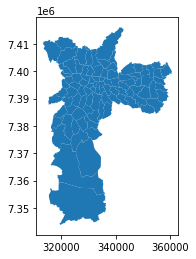

In [ ]:
dados_mapa.plot()

# Tratamento dos dados geográficos

In [ ]:
dados_mapa = dados_mapa.sort_values('ds_codigo')
dados = dados.sort_values('cod_ibge')

In [ ]:
dados.columns

Index(['cod_ibge', 'distritos', 'F1', 'F2', 'ranking', 'F3', 'ranking2'], dtype='object')

In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 5.8 MB/s 


In [ ]:
from unidecode import unidecode

In [ ]:
nomes_distrito = [unidecode(distrito).upper() for distrito in dados['distritos']]

In [ ]:
dados['nome_distrito'] = nomes_distrito

In [ ]:
distritos_distintos = dados['nome_distrito'].values != dados_mapa['ds_nome'].values
distritos_distintos.sum()

1

In [ ]:
dados[distritos_distintos]

,cod_ibge,distritos,F1,F2,ranking,F3,ranking2,nome_distrito
67,65,Sarcomã,-0.387175,-0.071781,-0.222492,-1.878435,-0.430446,SARCOMA


In [ ]:
dados_mapa[distritos_distintos]

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,geometry
72,68,IPIRANGA,13,SAC,SACOMA,"POLYGON ((338736.624 7387832.779, 338733.609 7..."


In [ ]:
dados.replace({'SARCOMA':'SACOMA', 'Sarcomã':'Sacomã'}, inplace=True)

In [ ]:
dados[distritos_distintos]

,cod_ibge,distritos,F1,F2,ranking,F3,ranking2,nome_distrito
67,65,Sacomã,-0.387175,-0.071781,-0.222492,-1.878435,-0.430446,SACOMA


In [ ]:
dados_completos = dados_mapa.merge(dados, how='left', left_on='ds_nome', right_on='nome_distrito')
dados_completos.columns

Index(['ds_codigo', 'ds_subpref', 'ds_cd_sub', 'ds_sigla', 'ds_nome',
       'geometry', 'cod_ibge', 'distritos', 'F1', 'F2', 'ranking', 'F3',
       'ranking2', 'nome_distrito'],
      dtype='object')

# Mapa de calor

In [ ]:
import matplotlib

In [ ]:
#selecionar as coordendas x e y para colocar os nomes dos distritos
dados_completos['coords'] = dados_completos['geometry'].apply(lambda x: x.representative_point().coords[0])

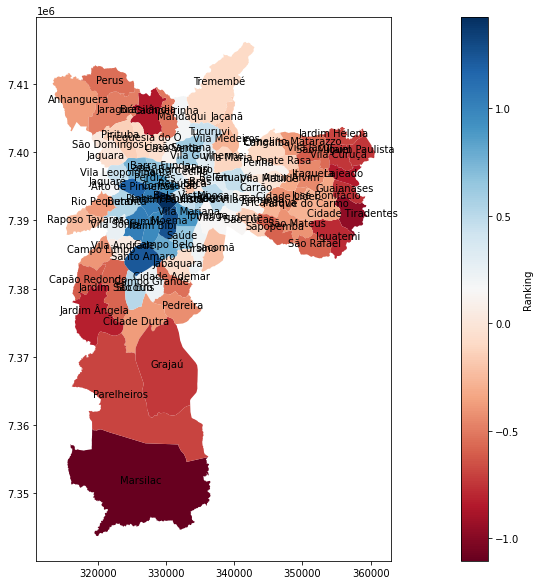

In [ ]:
plt = dados_completos.plot(column='ranking', legend=True, 
                     legend_kwds = {'label':'Ranking', 'orientation':'vertical'}, 
                     cmap='RdBu',
                     figsize = (25,10))

for índice, linha in dados_completos.iterrows():
  plt.annotate(s = linha['distritos'], xy=linha['coords'], horizontalalignment = 'center', color = 'black')



Pelo PCA podemos identificar que os distritos mais centrais possuem melhores variáveis com relação a qualidade de vida e os periféricos possuem piores variáveis relacionadas a essa questão.

# Mapas dinâmicos

In [ ]:
!pip install --upgrade folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.2 MB/s 
  Attempting uninstall: folium
    Found existing installation: folium 0.12.1.post1
    Uninstalling folium-0.12.1.post1:
      Successfully uninstalled folium-0.12.1.post1


In [ ]:
import folium

In [ ]:
folium.__version__

'0.13.0'

In [ ]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mapclassify

In [ ]:
base = dados_completos.explore(column='ranking',
                        cmap='RdBu',
                        tooltip = 'distritos',
                        tooltip_kwds = dict(label = False))

folium.TileLayer('Open Street Map').add_to(base)
folium.TileLayer('Stamen Terrain').add_to(base)
folium.TileLayer('cartodbpositron').add_to(base)
folium.TileLayer('Stamen Toner').add_to(base)
folium.LayerControl().add_to(base)
base

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
base.save('Rankings.html')

In [ ]:
dados_completos_ordenados=dados_completos.sort_values('ranking', ascending = False)
dados_completos_ordenados['posicao'] = range(1,len(dados_completos_ordenados)+1)

In [ ]:
base = dados_completos_ordenados.explore(column='ranking',
                        cmap='RdBu',
                        tooltip = ['distritos','posicao','ranking'],
                        tooltip_kwds = dict(label = False))

folium.TileLayer('Open Street Map').add_to(base)
folium.TileLayer('Stamen Terrain').add_to(base)
folium.TileLayer('cartodbpositron').add_to(base)
folium.TileLayer('Stamen Toner').add_to(base)
folium.LayerControl().add_to(base)
base

Output hidden; open in https://colab.research.google.com to view.